<a href="https://colab.research.google.com/github/Punith777/github123/blob/main/Model_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install the datasets library (if not installed)
!pip install datasets librosa soundfile matplotlib

# Import necessary libraries
from datasets import load_dataset
import librosa
import librosa.display
import soundfile as sf
import matplotlib.pyplot as plt
from IPython.display import Audio

# Load the VoiceBank-DEMAND-16k dataset
dataset = load_dataset("JacobLinCool/VoiceBank-DEMAND-16k")

# Check dataset structure
print(dataset)

# Get a sample audio file
sample = dataset["train"][0]  # First sample from the 'train' split
audio_array = sample["audio"]["array"]
sampling_rate = sample["audio"]["sampling_rate"]

# Display audio properties
print(f"Sample Rate: {sampling_rate} Hz")
print(f"Duration: {len(audio_array) / sampling_rate:.2f} sec")

# Plot waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_array, sr=sampling_rate)
plt.title("Waveform of Sample Audio")
plt.show()

# Play the audio
Audio(audio_array, rate=sampling_rate)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.4 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/652 [00:00<?, ?B/s]

train-00000-of-00005.parquet:   0%|          | 0.00/444M [00:00<?, ?B/s]

train-00001-of-00005.parquet:   0%|          | 0.00/416M [00:00<?, ?B/s]

train-00002-of-00005.parquet:   0%|          | 0.00/431M [00:00<?, ?B/s]

train-00003-of-00005.parquet:   0%|          | 0.00/444M [00:00<?, ?B/s]

train-00004-of-00005.parquet:   0%|          | 0.00/416M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/132M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/11572 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/824 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'clean', 'noisy'],
        num_rows: 11572
    })
    test: Dataset({
        features: ['id', 'clean', 'noisy'],
        num_rows: 824
    })
})


KeyError: 'audio'

In [3]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("JacobLinCool/VoiceBank-DEMAND-16k")

# Print the dataset structure
print(dataset)

# Print the first sample to inspect its keys
sample = dataset["train"][0]
print(sample.keys())


DatasetDict({
    train: Dataset({
        features: ['id', 'clean', 'noisy'],
        num_rows: 11572
    })
    test: Dataset({
        features: ['id', 'clean', 'noisy'],
        num_rows: 824
    })
})
dict_keys(['id', 'clean', 'noisy'])


Sample Rate: 16000 Hz
Duration: 2.28 sec


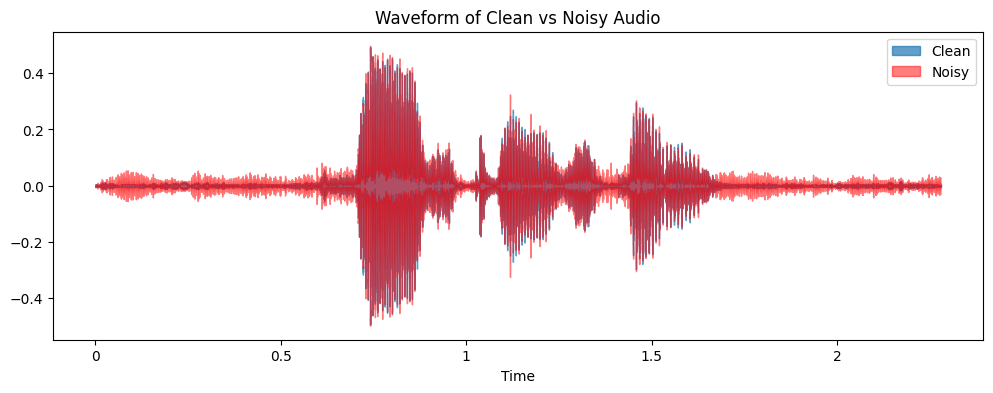

Playing Clean Audio:


Playing Noisy Audio:


In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("JacobLinCool/VoiceBank-DEMAND-16k")

# Get a sample from the dataset (first audio file)
sample = dataset["train"][0]

# Extract clean and noisy audio data
clean_audio = sample["clean"]["array"]
noisy_audio = sample["noisy"]["array"]
sampling_rate = sample["clean"]["sampling_rate"]  # Both have the same sample rate

# Print details
print(f"Sample Rate: {sampling_rate} Hz")
print(f"Duration: {len(clean_audio) / sampling_rate:.2f} sec")

# Plot waveform (clean vs noisy)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(clean_audio, sr=sampling_rate, alpha=0.7, label="Clean")
librosa.display.waveshow(noisy_audio, sr=sampling_rate, color="r", alpha=0.5, label="Noisy")
plt.title("Waveform of Clean vs Noisy Audio")
plt.legend()
plt.show()

# Play audio files
print("Playing Clean Audio:")
display(Audio(clean_audio, rate=sampling_rate))

print("Playing Noisy Audio:")
display(Audio(noisy_audio, rate=sampling_rate))


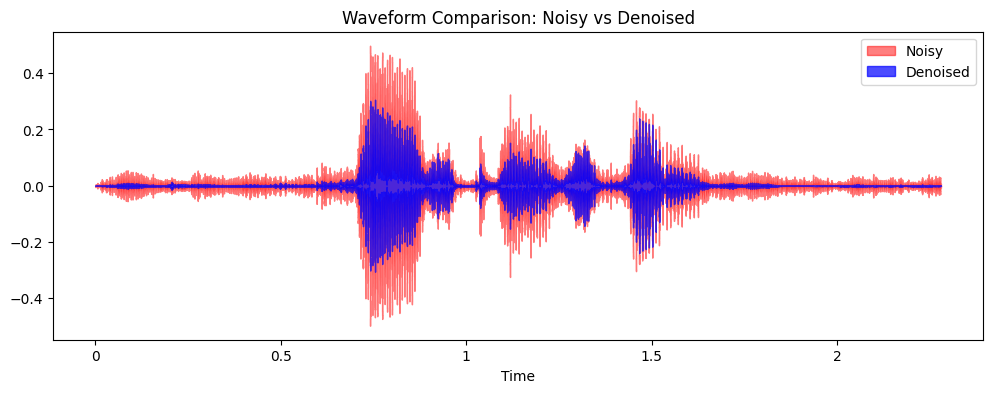

Playing Denoised Audio:


In [12]:
import noisereduce as nr  # Noise reduction library
import numpy as np

# Apply noise reduction
reduced_audio = nr.reduce_noise(y=noisy_audio, sr=sampling_rate, prop_decrease=1.0)

# Plot original vs denoised waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(noisy_audio, sr=sampling_rate, color="r", alpha=0.5, label="Noisy")
librosa.display.waveshow(reduced_audio, sr=sampling_rate, color="b", alpha=0.7, label="Denoised")
plt.title("Waveform Comparison: Noisy vs Denoised")
plt.legend()
plt.show()

# Play the denoised audio
print("Playing Denoised Audio:")
display(Audio(reduced_audio, rate=sampling_rate))


/usr/local/lib/python3.11/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


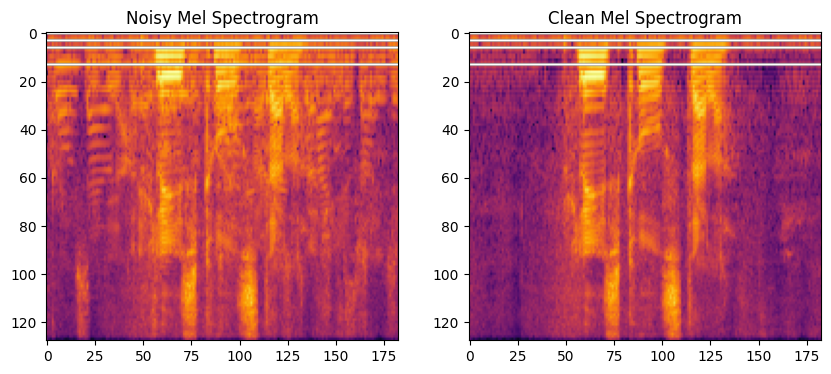

In [13]:
import torch
import torchaudio
import torchaudio.transforms as transforms
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Function to convert audio to Mel Spectrogram
def audio_to_mel(audio, sr, n_mels=128):
    mel_transform = transforms.MelSpectrogram(sample_rate=sr, n_mels=n_mels)
    mel_spec = mel_transform(torch.tensor(audio).float())  # Convert to tensor
    return mel_spec

# Load dataset
from datasets import load_dataset
dataset = load_dataset("JacobLinCool/VoiceBank-DEMAND-16k")

# Get a sample audio (first training sample)
sample = dataset["train"][0]
noisy_audio = sample["noisy"]["array"]
clean_audio = sample["clean"]["array"]
sampling_rate = sample["clean"]["sampling_rate"]

# Convert to Mel Spectrogram
noisy_mel = audio_to_mel(noisy_audio, sampling_rate)
clean_mel = audio_to_mel(clean_audio, sampling_rate)

# Plot spectrograms
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(noisy_mel.log2().numpy(), cmap='inferno', aspect='auto')
plt.title("Noisy Mel Spectrogram")

plt.subplot(1, 2, 2)
plt.imshow(clean_mel.log2().numpy(), cmap='inferno', aspect='auto')
plt.title("Clean Mel Spectrogram")
plt.show()


In [14]:
import torch.nn as nn

class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [15]:
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

# Convert dataset into PyTorch-friendly format
class AudioDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset["train"]

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        sample = self.dataset[idx]
        noisy_audio = sample["noisy"]["array"]
        clean_audio = sample["clean"]["array"]
        sr = sample["clean"]["sampling_rate"]

        # Convert to Mel Spectrograms
        noisy_mel = audio_to_mel(noisy_audio, sr).unsqueeze(0)  # Add channel dim
        clean_mel = audio_to_mel(clean_audio, sr).unsqueeze(0)

        return noisy_mel, clean_mel

# Load data
train_dataset = AudioDataset(dataset)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DenoisingAutoencoder().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()


In [17]:
import torch.nn.functional as F

class AudioDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset["train"]

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        sample = self.dataset[idx]
        noisy_audio = sample["noisy"]["array"]
        clean_audio = sample["clean"]["array"]
        sr = sample["clean"]["sampling_rate"]

        # Convert to Mel Spectrograms
        noisy_mel = audio_to_mel(noisy_audio, sr).unsqueeze(0)  # Shape: [1, 128, T]
        clean_mel = audio_to_mel(clean_audio, sr).unsqueeze(0)

        return noisy_mel, clean_mel

# Custom collate function to pad all spectrograms in a batch to the same size
def collate_fn(batch):
    noisy_batch, clean_batch = zip(*batch)

    # Find max time dimension
    max_len = max([mel.shape[-1] for mel in noisy_batch])

    # Pad all spectrograms to match max length
    noisy_padded = [F.pad(mel, (0, max_len - mel.shape[-1])) for mel in noisy_batch]
    clean_padded = [F.pad(mel, (0, max_len - mel.shape[-1])) for mel in clean_batch]

    return torch.stack(noisy_padded), torch.stack(clean_padded)

# Load dataset
train_dataset = AudioDataset(dataset)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the Convolutional Autoencoder
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()

        # Encoder: Convolution layers
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # Output: [16, 64, T/2]
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),  # Output: [32, 32, T/4]
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),  # Output: [64, 16, T/8]
            nn.ReLU()
        )

        # Decoder: Transposed Convolution layers
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  # Output: [1, 128, T] (Same shape as input)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DenoisingAutoencoder().to(device)


In [ ]:
import torch.nn.functional as F

# Training loop
num_epochs = 10  # Adjust as needed
for epoch in range(num_epochs):
    total_loss = 0
    model.train()

    for noisy, clean in train_loader:
        noisy, clean = noisy.to(device), clean.to(device)

        # Ensure noisy and clean have the same shape
        min_length = min(noisy.shape[-1], clean.shape[-1])
        noisy = noisy[:, :, :, :min_length]  # Crop noisy to match clean
        clean = clean[:, :, :, :min_length]  # Crop clean to match noisy

        # Forward pass
        denoised = model(noisy)

        # Also crop denoised output to match target clean shape
        denoised = denoised[:, :, :, :min_length]

        loss = criterion(denoised, clean)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")

print("Model training complete!")


Epoch [1/10], Loss: 48.2149
Epoch [2/10], Loss: 48.5155
Epoch [3/10], Loss: 48.5611
Epoch [4/10], Loss: 48.6533
Epoch [5/10], Loss: 48.0881
